In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

sns.set_style('whitegrid')

In [ ]:
# Download the dataset using the Kaggle Hub API
print("Downloading dataset...")
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

# Load the dataset from the downloaded path
file_path = f'{path}/heart_disease_uci.csv'
df = pd.read_csv(file_path)

print("Dataset downloaded and loaded successfully.")
print(f"Data shape: {df.shape}")
df.head()

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Dataset downloaded and loaded successfully.
Data shape: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.isnull().sum().sum()

np.int64(1759)

Text(0, 0.5, 'Count')

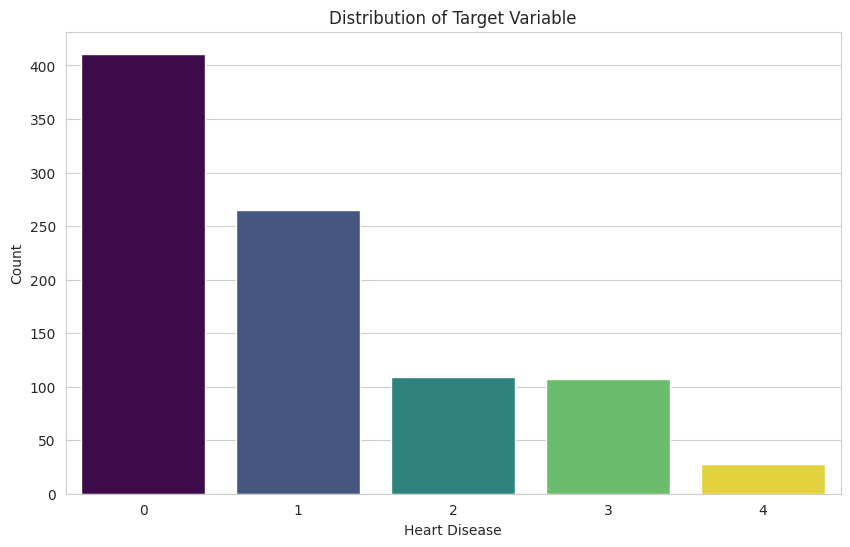

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='num', data=df, palette='viridis',hue='num',legend=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

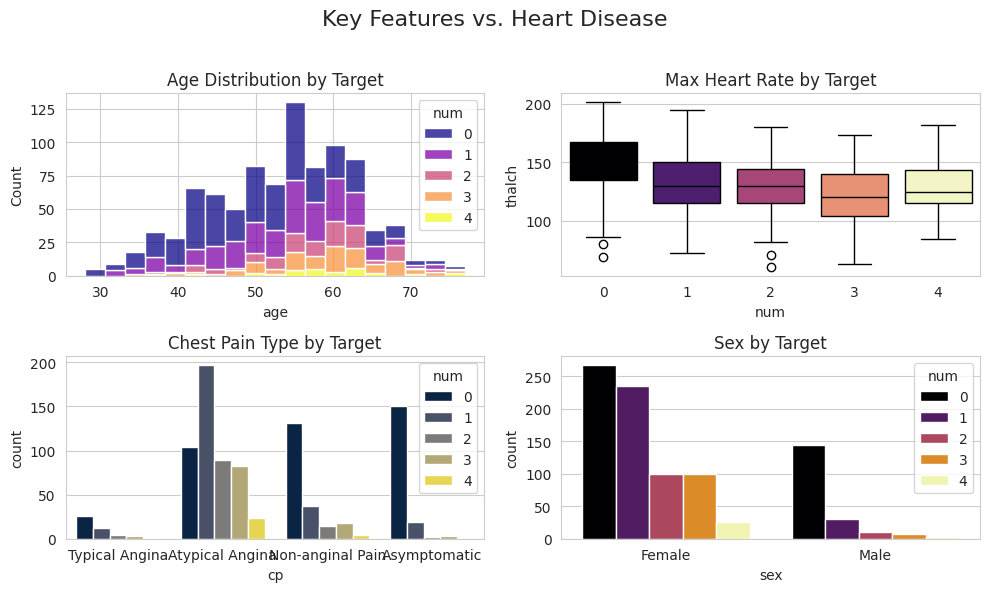

In [ ]:
# Let's visualize the relationship between key features and the target
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
fig.suptitle('Key Features vs. Heart Disease', fontsize=16)

# Age vs. Target
sns.histplot(ax=axes[0, 0], data=df, x='age', hue='num', multiple='stack', palette='plasma').set_title('Age Distribution by Target')

# Max Heart Rate vs. Target
sns.boxplot(ax=axes[0, 1], data=df, x='num', y='thalch', palette='magma', hue='num', legend=False).set_title('Max Heart Rate by Target')

# Chest Pain Type vs. Target
cp_plot = sns.countplot(ax=axes[1, 0], data=df, x='cp', hue='num', palette='cividis')
cp_plot.set_title('Chest Pain Type by Target')
cp_plot.set_xticks(range(len(df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Sex vs. Target
sex_plot = sns.countplot(ax=axes[1, 1], data=df, x='sex', hue='num', palette='inferno')
sex_plot.set_title('Sex by Target')
sex_plot.set_xticks(range(len(df['sex'].unique())))
sex_plot.set_xticklabels(['Female', 'Male'])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

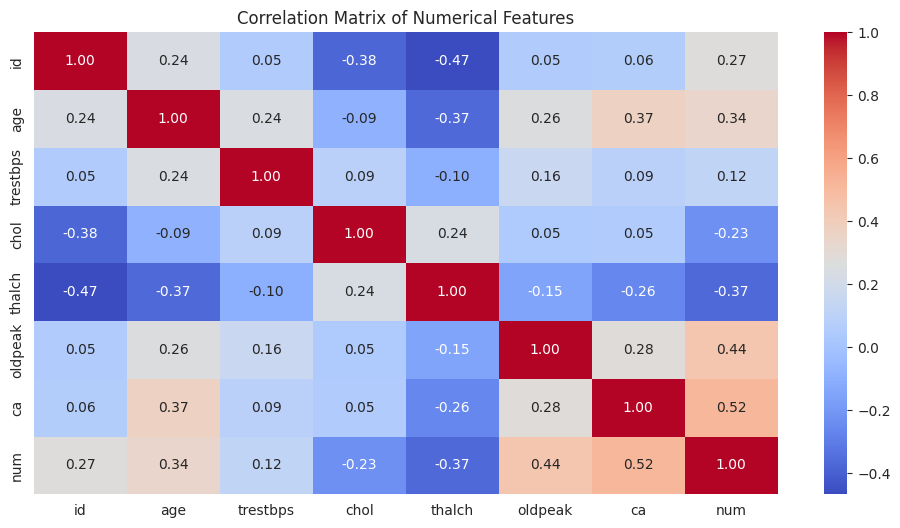

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

X = df.drop('num',axis=1)
y = df['num']

X = X.drop(['id','dataset'], axis=1)

In [ ]:
# Identify categorical and numerical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

In [ ]:
numerical_transformer = Pipeline( steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', StandardScaler())
]
)

In [ ]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_transformer,numerical_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalach',
                                  'oldpeak', 'ca']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope', 'thal'])])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Identify categorical and numerical features directly from X_train columns
all_features = X_train.columns.tolist()
categorical_features = [col for col in all_features if X_train[col].dtype == 'object']
numerical_features = [col for col in all_features if X_train[col].dtype != 'object']

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the Logistic Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

Numerical features: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Categorical features: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']


In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',RandomForestClassifier(n_estimators=10000,random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'thal'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=10000, random_state=42))])

In [ ]:
from sklearn.svm import SVC

# Create the SVM pipeline
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', SVC(random_state=42))])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN pipeline
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', KNeighborsClassifier())])

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

In [ ]:
print("--- Logistic Regression Performance ---")
print(classification_report(y_test, y_pred_lr, zero_division=0))

print("\n--- Random Forest Performance ---")
print(classification_report(y_test, y_pred_rf, zero_division=0))

print("\n--- Support Vector Machine (SVM) Performance ---")
print(classification_report(y_test, y_pred_svm, zero_division=0))

print("\n--- K-Nearest Neighbors (KNN) Performance ---")
print(classification_report(y_test, y_pred_knn, zero_division=0))

--- Logistic Regression Performance ---
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        82
           1       0.49      0.57      0.53        53
           2       0.30      0.14      0.19        22
           3       0.16      0.19      0.17        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.35      0.35      0.34       184
weighted avg       0.55      0.58      0.56       184


--- Random Forest Performance ---
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        82
           1       0.50      0.55      0.52        53
           2       0.14      0.09      0.11        22
           3       0.18      0.19      0.19        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.32      0.33      0.32       184
we

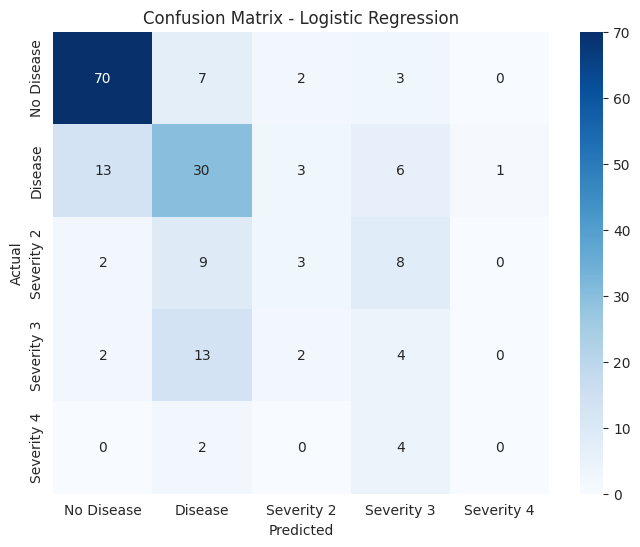

In [ ]:
# Visualize the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'], yticklabels=['No Disease', 'Disease', 'Severity 2', 'Severity 3', 'Severity 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### Submission Criteria

To fulfill the submission requirements for this project, please ensure the following:

1.  **Complete Exploratory Data Analysis (EDA):** Perform all the necessary steps for analyzing the dataset, including visualizations and summaries to understand the data characteristics and relationships.
2.  **Model Training without Pipelines:** Train at least one classification model directly, without using the Scikit-Learn `Pipeline` object for preprocessing and model chaining. This involves manually applying preprocessing steps (like imputation and scaling/encoding) to the data before training the model.
3.  **Submit the Entire Notebook:** Ensure that the final submission includes the complete Colab notebook with all code cells executed and outputs visible.

Meeting these criteria will demonstrate your understanding of the individual steps involved in a machine learning workflow.

In [ ]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.set_index(df['id'])
df_changed=df.drop(columns=['id','dataset'],axis=1)
df_changed

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_changed.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62


In [ ]:
df_changed['trestbps'].value_counts()

,count
trestbps,
120.0,131
130.0,115
140.0,102
110.0,59
150.0,56
...,...
92.0,1
185.0,1
0.0,1


In [ ]:
df_changed['trestbps']=df_changed['trestbps'].fillna(df_changed['trestbps'].median())

In [ ]:
df_changed['chol'].value_counts()

,count
chol,
0.0,172
220.0,10
254.0,10
204.0,9
219.0,9
...,...
165.0,1
337.0,1
333.0,1


In [ ]:
df_changed['chol']=df_changed['chol'].fillna(df_changed['chol'].median())

In [ ]:
df_changed['chol'].isnull().sum()

np.int64(0)

In [ ]:
display(df_changed.select_dtypes(include=np.number))

,age,trestbps,chol,thalch,oldpeak,ca,num
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,2
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,130.0,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,2
918,58,130.0,385.0,NaN,NaN,NaN,0


In [ ]:
df_changed['thalch'].value_counts()
df_changed['thalch']=df_changed['thalch'].fillna(df_changed['thalch'].mean())

In [ ]:
df_changed['oldpeak'].value_counts()
df_changed['oldpeak']=df_changed['oldpeak'].fillna(df_changed['oldpeak'].mode()[0])

In [ ]:
df_changed['ca'].value_counts()
df_changed['ca']=df_changed['ca'].fillna(df_changed['ca'].mode()[0])

In [ ]:
display(df_changed.select_dtypes(include=object))

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...,...,...
915,Female,asymptomatic,True,st-t abnormality,False,NaN,NaN
916,Male,typical angina,False,st-t abnormality,NaN,NaN,NaN
917,Male,asymptomatic,True,st-t abnormality,False,NaN,fixed defect
918,Male,asymptomatic,True,lv hypertrophy,NaN,NaN,NaN


In [ ]:
df_changed[['sex','cp','fbs','restecg','exang','slope','thal']].isnull().sum()

,0
sex,0
cp,0
fbs,90
restecg,2
exang,55
slope,309
thal,486


In [ ]:
df_changed['fbs'].value_counts()
df_changed['fbs']=df_changed['fbs'].fillna(df_changed['fbs'].mode()[0])

In [ ]:
df_changed['fbs'].value_counts()

,count
fbs,
0,692
2,138
1,90


In [ ]:
df_changed['exang']=df_changed['exang'].fillna(df_changed['exang'].mode()[0])
df_changed['exang'].value_counts()

,count
exang,
False,583
True,337


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_changed['fbs']=le.fit_transform(df_changed['fbs'])
df_changed['exang']=le.fit_transform(df_changed['exang'])
df_changed['sex']=le.fit_transform(df_changed['sex'])
df_changed

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,typical angina,145.0,233.0,2,lv hypertrophy,150.000000,0,2.3,downsloping,0.0,fixed defect,0
1,67,1,asymptomatic,160.0,286.0,0,lv hypertrophy,108.000000,1,1.5,flat,3.0,normal,2
2,67,1,asymptomatic,120.0,229.0,0,lv hypertrophy,129.000000,1,2.6,flat,2.0,reversable defect,1
3,37,1,non-anginal,130.0,250.0,0,normal,187.000000,0,3.5,downsloping,0.0,normal,0
4,41,0,atypical angina,130.0,204.0,0,lv hypertrophy,172.000000,0,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,asymptomatic,127.0,333.0,2,st-t abnormality,154.000000,0,0.0,NaN,0.0,NaN,1
916,62,1,typical angina,130.0,139.0,0,st-t abnormality,137.545665,0,0.0,NaN,0.0,NaN,0
917,55,1,asymptomatic,122.0,223.0,2,st-t abnormality,100.000000,0,0.0,NaN,0.0,fixed defect,2
918,58,1,asymptomatic,130.0,385.0,2,lv hypertrophy,137.545665,0,0.0,NaN,0.0,NaN,0


In [ ]:
display(df_changed.select_dtypes(include=object))

,cp,restecg,slope,thal
0,typical angina,lv hypertrophy,downsloping,fixed defect
1,asymptomatic,lv hypertrophy,flat,normal
2,asymptomatic,lv hypertrophy,flat,reversable defect
3,non-anginal,normal,downsloping,normal
4,atypical angina,lv hypertrophy,upsloping,normal
...,...,...,...,...
915,asymptomatic,st-t abnormality,NaN,NaN
916,typical angina,st-t abnormality,NaN,NaN
917,asymptomatic,st-t abnormality,NaN,fixed defect
918,asymptomatic,lv hypertrophy,NaN,NaN


In [ ]:
categorical_cols_ohe = ['cp', 'restecg',  'slope', 'thal']

df_changed.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,2
thalch,0
exang,0
oldpeak,0


In [ ]:
df_changed['restecg'].value_counts()
df_changed['restecg']=df_changed['restecg'].fillna(df_changed['restecg'].mode()[0])

In [ ]:
df_changed['slope'].value_counts()
df_changed['slope']=df_changed['slope'].fillna(df_changed['slope'].mode()[0])

In [ ]:
df_changed['thal'].value_counts()
df_changed['thal']=df_changed['thal'].fillna(df_changed['thal'].mode()[0])

In [ ]:
df_changed.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [ ]:
display(df_changed.select_dtypes(include=object))

,cp,restecg,slope,thal
0,typical angina,lv hypertrophy,downsloping,fixed defect
1,asymptomatic,lv hypertrophy,flat,normal
2,asymptomatic,lv hypertrophy,flat,reversable defect
3,non-anginal,normal,downsloping,normal
4,atypical angina,lv hypertrophy,upsloping,normal
...,...,...,...,...
915,asymptomatic,st-t abnormality,flat,normal
916,typical angina,st-t abnormality,flat,normal
917,asymptomatic,st-t abnormality,flat,fixed defect
918,asymptomatic,lv hypertrophy,flat,normal


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
df_changed['cp']=ohe.fit_transform(df_changed[['cp']]).toarray()
df_changed['restecg']=ohe.fit_transform(df_changed[['restecg']]).toarray()
df_changed['slope']=ohe.fit_transform(df_changed[['slope']]).toarray()
df_changed['thal']=ohe.fit_transform(df_changed[['thal']]).toarray()
df_changed

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,1.0,145.0,233.0,2,1.0,150.000000,0,2.3,1.0,0.0,1.0,0
1,67,1,0.0,160.0,286.0,0,1.0,108.000000,1,1.5,0.0,3.0,0.0,2
2,67,1,0.0,120.0,229.0,0,1.0,129.000000,1,2.6,0.0,2.0,0.0,1
3,37,1,1.0,130.0,250.0,0,0.0,187.000000,0,3.5,1.0,0.0,0.0,0
4,41,0,1.0,130.0,204.0,0,1.0,172.000000,0,1.4,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,0.0,127.0,333.0,2,0.0,154.000000,0,0.0,0.0,0.0,0.0,1
916,62,1,1.0,130.0,139.0,0,0.0,137.545665,0,0.0,0.0,0.0,0.0,0
917,55,1,0.0,122.0,223.0,2,0.0,100.000000,0,0.0,0.0,0.0,1.0,2
918,58,1,0.0,130.0,385.0,2,1.0,137.545665,0,0.0,0.0,0.0,0.0,0


from matplotlib import pyplot as plt
df_changed['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_changed['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_changed['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_changed['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_changed['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

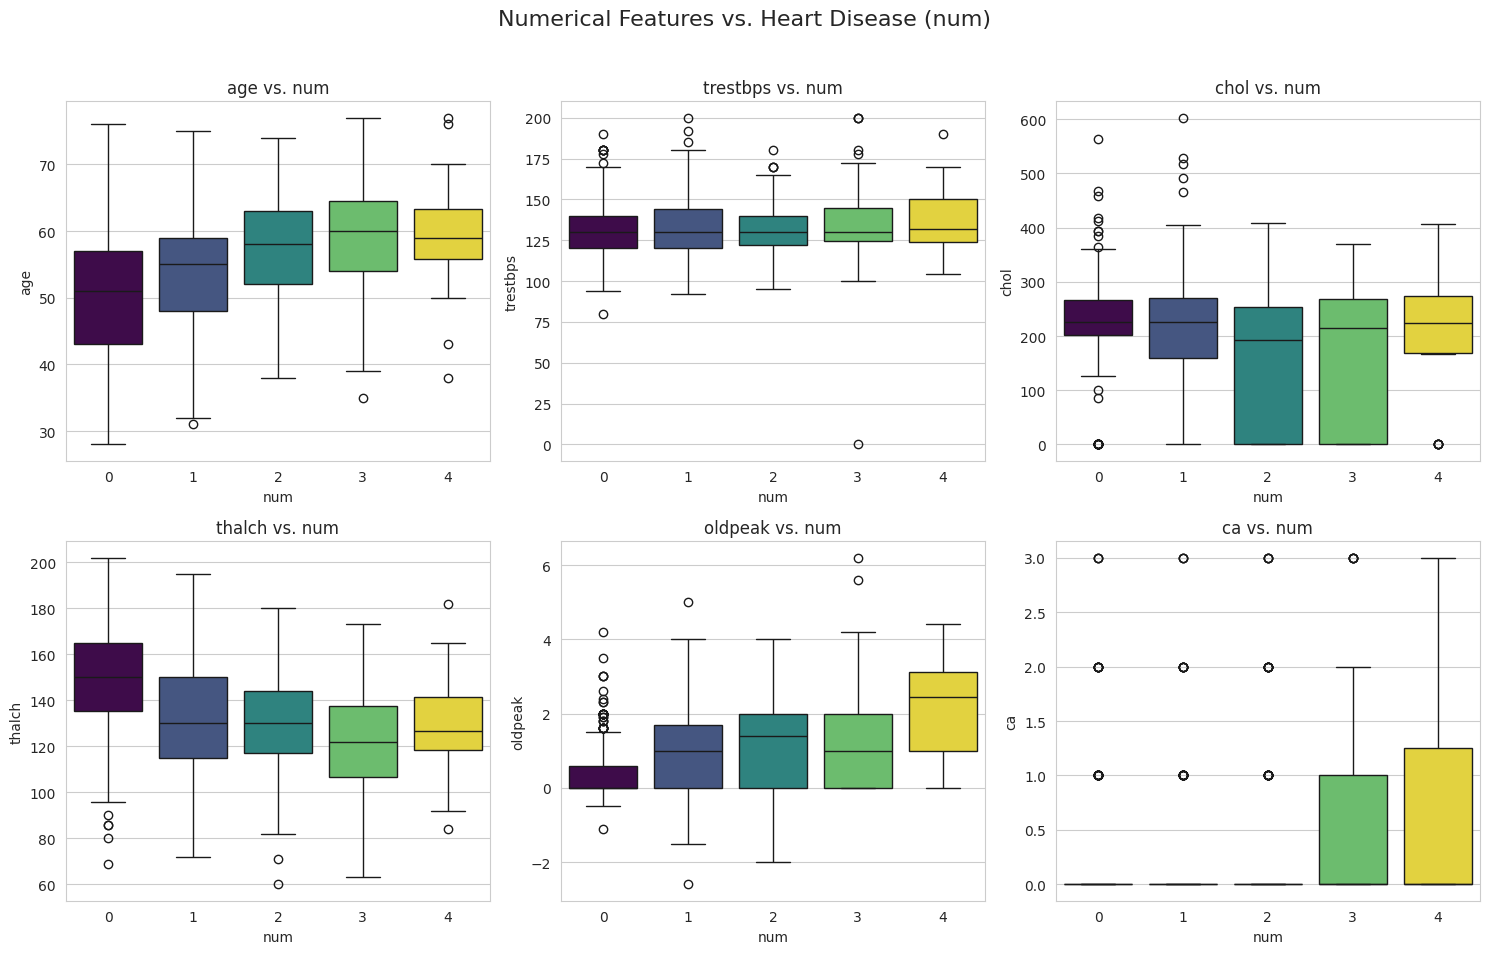

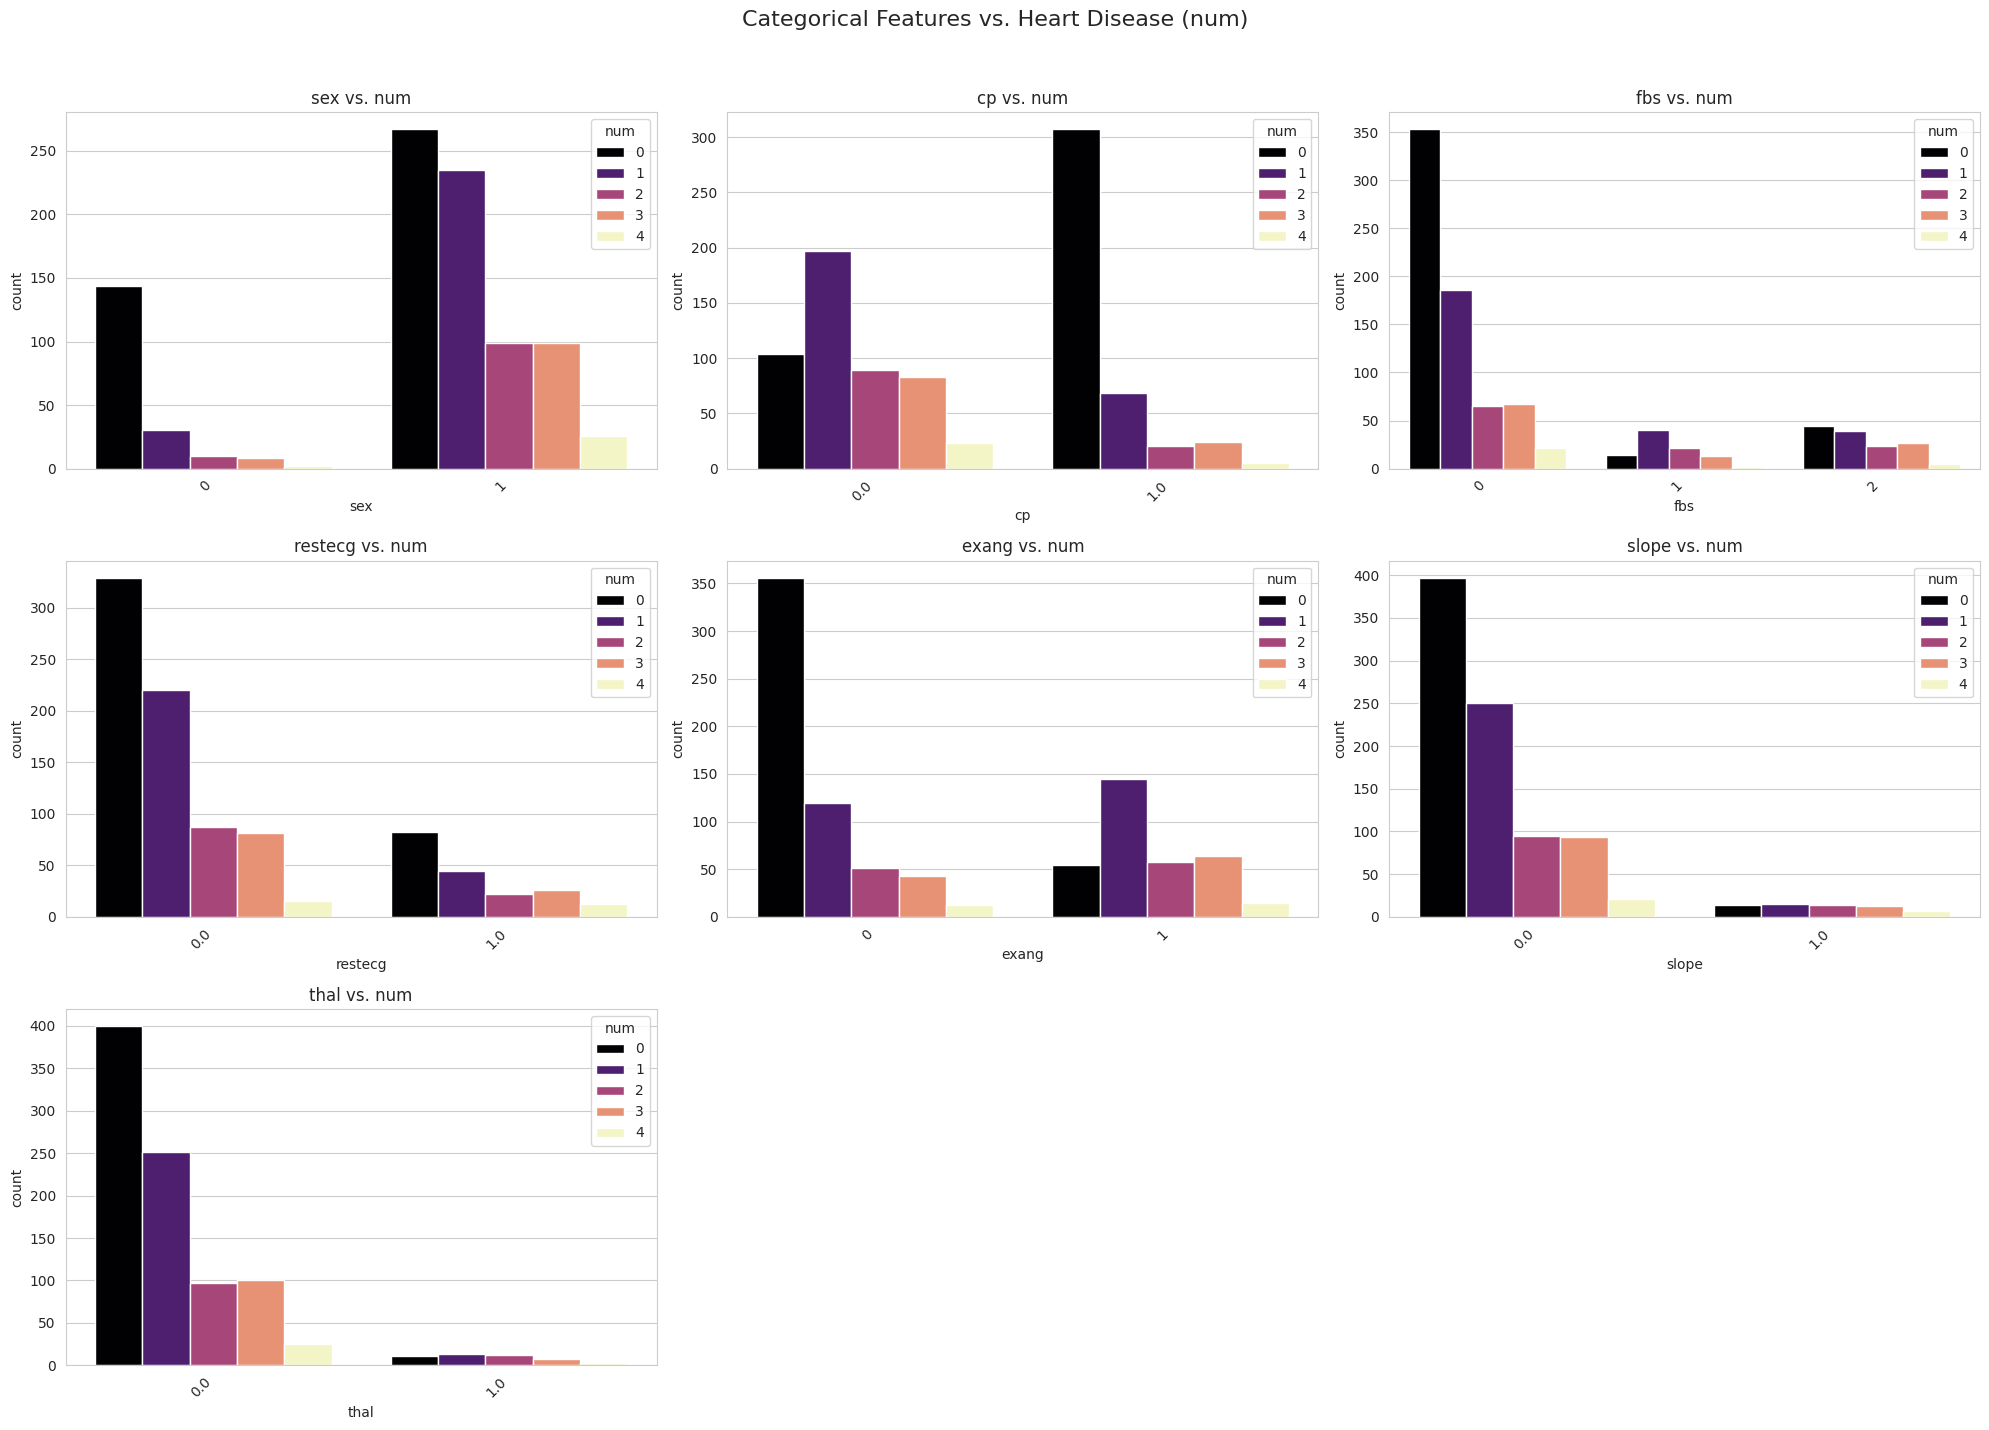

In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Visualizing Numerical Features vs. Target
plt.figure(figsize=(15, 10))
plt.suptitle('Numerical Features vs. Heart Disease (num)', fontsize=16)
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='num', y=col, data=df_changed, palette='viridis', hue='num', legend=False)
    plt.title(f'{col} vs. num')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

# Visualizing Categorical Features vs. Target
plt.figure(figsize=(20, 15))
plt.suptitle('Categorical Features vs. Heart Disease (num)', fontsize=16)
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(x=col, hue='num', data=df_changed, palette='magma')
    plt.title(f'{col} vs. num')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [ ]:
from sklearn.preprocessing import StandardScaler
X=df_changed.iloc[:,0:-1].values
y=df_changed.iloc[:,-1].values
X=StandardScaler().fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        82
           1       0.44      0.55      0.49        53
           2       0.36      0.18      0.24        22
           3       0.11      0.10      0.10        21
           4       0.00      0.00      0.00         6

    accuracy                           0.56       184
   macro avg       0.34      0.33      0.33       184
weighted avg       0.53      0.56      0.54       184



In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred1=rfc.predict(X_test)
print(classification_report(y_test,y_pred1,zero_division=0))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        82
           1       0.48      0.58      0.53        53
           2       0.21      0.14      0.17        22
           3       0.11      0.10      0.10        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.32      0.33      0.33       184
weighted avg       0.54      0.58      0.55       184



In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)
print(classification_report(y_test,y_pred2,zero_division=0))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        82
           1       0.47      0.49      0.48        53
           2       0.29      0.27      0.28        22
           3       0.12      0.05      0.07        21
           4       0.00      0.00      0.00         6

    accuracy                           0.58       184
   macro avg       0.32      0.34      0.33       184
weighted avg       0.51      0.58      0.54       184



In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
y_pred3=svm.predict(X_test)
print(classification_report(y_test,y_pred3,zero_division=0))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        82
           1       0.47      0.60      0.53        53
           2       0.14      0.05      0.07        22
           3       0.05      0.05      0.05        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.29      0.31      0.29       184
weighted avg       0.51      0.57      0.53       184



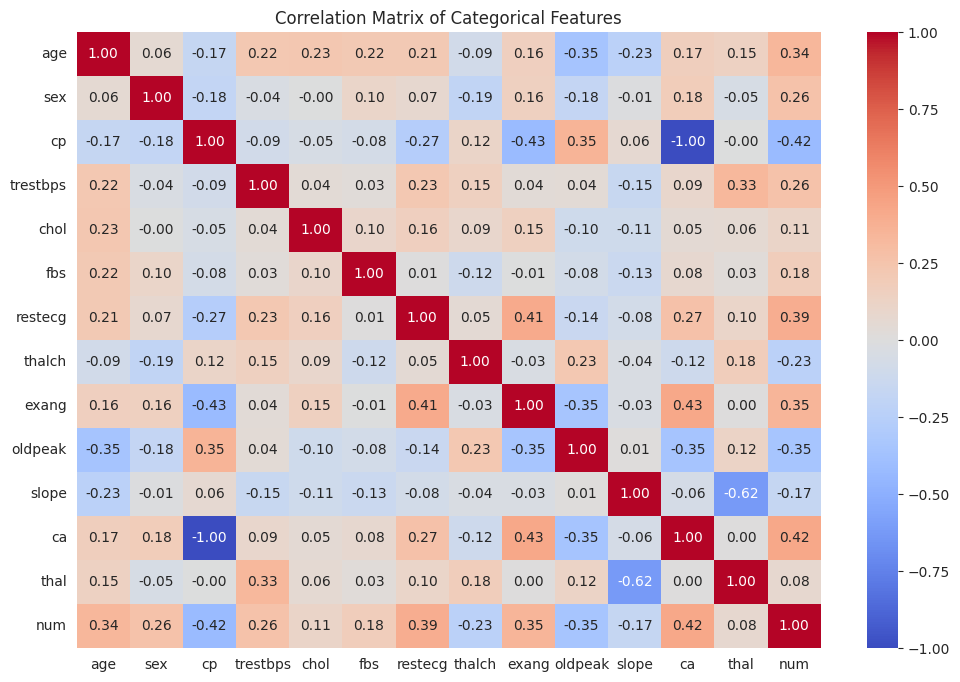

In [ ]:
from pandas.core.arrays import categorical
plt.figure(figsize=(12, 8))
all_df = df_changed.select_dtypes(include=np.number)
sns.heatmap(all_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Categorical Features')
plt.show()